代码需在google colab平台上运行，运行时硬件加速器为TPU，运行时规格为标准。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!pip install tensorflow~=2.4.0 tensorflow_gcs_config~=2.4.0

     |████████████████████████████████| 394.5 MB 32 kB/s 
     |████████████████████████████████| 401 kB 41.8 MB/s 
     |████████████████████████████████| 14.8 MB 604 kB/s 
     |████████████████████████████████| 2.9 MB 29.3 MB/s 
     |████████████████████████████████| 132 kB 31.5 MB/s 
     |████████████████████████████████| 462 kB 18.1 MB/s 
     |████████████████████████████████| 3.8 MB 28.0 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68722 sha256=53dd5c43c53d3b3173adb191bac96ca236b8ca8670431526b093457a454c194d
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:

### main pipeline

In [1]:
import os
IS_COLAB = not os.path.exists('/kaggle/input')
print(IS_COLAB) 

True


In [2]:
# !pip install tfimm
# !pip install timm
# import tfimm
# print(tfimm.list_models(pretrained="timm"))

In [3]:
import tensorflow as tf
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

AUTO = tf.data.experimental.AUTOTUNE
print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.89.127.106:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.89.127.106:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.89.127.106:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [4]:
tf.__version__

'2.4.4'

In [5]:
!pip install -q efficientnet
!pip install tensorflow_addons
import re
import os
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
import random
import math
import tensorflow as tf
import efficientnet.tfkeras as efn
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from tensorflow.keras import backend as K
import tensorflow_addons as tfa
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import pickle
import json
import tensorflow_hub as tfhub
from datetime import datetime
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_bfloat16')
mixed_precision.set_global_policy(policy)

     |████████████████████████████████| 50 kB 2.5 MB/s 
     |████████████████████████████████| 1.1 MB 4.2 MB/s 


/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


## Config

In [6]:
save_dir = '.'
EXPERIMENT = 0
run_ts = datetime.now().strftime('%Y%m%d-%H%M%S')
print(run_ts)
EPS = tf.keras.backend.epsilon()
if IS_COLAB:
    save_dir = f'/content/drive/MyDrive/happywhale/backfin/fold0_dolg_b7x640_half_feat2_pl_25k_ep60/'
    !mkdir -p {save_dir}

20220421-100819


In [7]:
class config:
    
    
    SEED = 42
    FOLD_TO_RUN = 0
    FOLDS = 5
    DEBUG = False
    EVALUATE = True
    RESUME = False
    RESUME_EPOCH = 27
    
    
    ### Dataset
    BATCH_SIZE = 8 * strategy.num_replicas_in_sync
    IMAGE_SIZE = 640
    N_CLASSES = 15587
    
    ### Model
    model_type = 'effnetv1' #'effnetv1'  
    EFF_NET = 7
    EFF_NETV2 = 's-21k-ft1k'
    FREEZE_BATCH_NORM = False
    head = 'arcface' 
    # head = 'arcface_subcenter'
    EPOCHS = 60
    LR = 0.001
    message='baseline'
    
    ### Augmentations
    CUTOUT = False
    
    ### Save-Directory
    save_dir = save_dir
    
    ### Inference
    KNN = 100
    
def count_data_items(filenames):
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) 
         for filename in filenames]
    return np.sum(n)

# Function to seed everything
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)
    
def is_interactive():
    return 'runtime'    in get_ipython().config.IPKernelApp.connection_file
IS_INTERACTIVE = is_interactive()
print(IS_INTERACTIVE)

True


In [8]:
HEIGHT = config.IMAGE_SIZE
WIDTH = config.IMAGE_SIZE
CHANNELS = 3
image_size = config.IMAGE_SIZE

In [9]:
MODEL_NAME = None
if config.model_type == 'effnetv1':
    MODEL_NAME = f'effnetv1_b{config.EFF_NET}'
elif config.model_type == 'effnetv2':
    MODEL_NAME = f'effnetv2_{config.EFF_NETV2}'

config.MODEL_NAME = MODEL_NAME
print(MODEL_NAME)

effnetv1_b7


In [10]:
with open(config.save_dir+'/config.json', 'w') as fp:
    json.dump({x:dict(config.__dict__)[x] for x in dict(config.__dict__) if not x.startswith('_')}, fp)

In [11]:
#下面两个gcs地址由代码-happywhale-gcs-on-kaggle.ipynb 获取
#KaggleDatasets().get_gcs_path('whale-tfrecords-backfin')#背鳍数据集gcs链接地址
GCS_PATH = 'gs://kds-da2f897ed8c8dc563a063966df60efe5b7515061aaaa2c0bb4752574'  # Get GCS Path from kaggle notebook if GCS Path is expired
#KaggleDatasets().get_gcs_path('whale-tfrecords-backfin-pesudo-22k')#伪标签数据集gcs链接地址
GCS_PATH2 = 'gs://kds-43df466a41983f4e878986b8903b3b6d4efe70a62e5a0dc967a3caca'  # Get GCS Path from kaggle notebook if GCS Path is expired

train_files = np.sort(np.array(tf.io.gfile.glob(GCS_PATH + '/happywhale-2022-train*.tfrec')))
train_files2 = np.sort(np.array(tf.io.gfile.glob(GCS_PATH2 + '/happywhale-2022-train*.tfrec')))
test_files = np.sort(np.array(tf.io.gfile.glob(GCS_PATH + '/happywhale-2022-test*.tfrec')))
print(GCS_PATH)
print(len(train_files),len(test_files),count_data_items(train_files),count_data_items(test_files))

gs://kds-da2f897ed8c8dc563a063966df60efe5b7515061aaaa2c0bb4752574
5 5 51026 27956


## Data

In [13]:
def random_float(minval=0.0, maxval=1.0):
    rnd = tf.random.uniform(
        [], minval=minval, maxval=maxval, dtype=tf.float32)
    return rnd
def choice(p, image1,  image2):
    rnd = random_float()
    image = tf.where(rnd <= p, image1, image2)
    # mask = tf.where(rnd <= p, mask1, mask2)
    return image
def RandomRotate(Degree,p):
    def _do_RandomRotate(image):
        degree = random.uniform(-Degree, Degree)
        aug_image = tfa.image.rotate(image, degree * math.pi / 180)

        return choice(p, aug_image,  image)
    return _do_RandomRotate
random_rotate = RandomRotate(Degree= 25,p=0.5)

In [14]:
def arcface_format(posting_id, image, label_group, matches):
    return posting_id, {'inp1': image, 'inp2': label_group}, label_group, matches

def arcface_inference_format(posting_id, image, label_group, matches):
    return image,posting_id

def arcface_eval_format(posting_id, image, label_group, matches):
    return image,label_group

# Data augmentation function
def data_augment(posting_id, image, label_group, matches):

    ### CUTOUT
    if tf.random.uniform([])>0.5 and config.CUTOUT:
      N_CUTOUT = 6
      for cutouts in range(N_CUTOUT):
        if tf.random.uniform([])>0.5:
           DIM = config.IMAGE_SIZE
           CUTOUT_LENGTH = DIM//8
           x1 = tf.cast( tf.random.uniform([],0,DIM-CUTOUT_LENGTH),tf.int32)
           x2 = tf.cast( tf.random.uniform([],0,DIM-CUTOUT_LENGTH),tf.int32)
           filter_ = tf.concat([tf.zeros((x1,CUTOUT_LENGTH)),tf.ones((CUTOUT_LENGTH,CUTOUT_LENGTH)),tf.zeros((DIM-x1-CUTOUT_LENGTH,CUTOUT_LENGTH))],axis=0)
           filter_ = tf.concat([tf.zeros((DIM,x2)),filter_,tf.zeros((DIM,DIM-x2-CUTOUT_LENGTH))],axis=1)
           cutout = tf.reshape(1-filter_,(DIM,DIM,1))
           image = cutout*image

    image = tf.image.random_flip_left_right(image)
    # image = tf.image.random_flip_up_down(image)
    image = tfa.image.random_hsv_in_yiq(image,max_delta_hue=0.2,lower_saturation=0.7,upper_saturation=1.3,lower_value=0.8,upper_value=1.2)
    # image = tf.image.random_hue(image, 0.01)
    # image = tf.image.random_saturation(image, 0.70, 1.30)
    image = tf.image.random_contrast(image, 0.80, 1.20)
    image = tf.image.random_brightness(image, 0.20)
    image = random_rotate(image)
    return posting_id, image, label_group, matches
# Data augmentation function
# def valid_augment(posting_id, image, label_group, matches):
#     return posting_id, image, label_group, matches
# Function to decode our images
# Updated to include crops.
def decode_image(image_data,box):
    if box is not None and box[0] != -1:
        left, top, right, bottom = int((box[0]+85)/3-128), int((box[1]+69)/2-96), int((box[2]+47)/3-152), int((box[3]+32)/2-326)
        bbs = tf.convert_to_tensor([top, left, bottom - top, right - left])
        image = tf.io.decode_and_crop_jpeg(image_data, bbs, channels=3)
    else:
        image = tf.image.decode_jpeg(image_data, channels = 3)
    image = tf.image.resize(image, [config.IMAGE_SIZE,config.IMAGE_SIZE])
    image = tf.cast(image, tf.float32) / 255.0
    return image

# This function parse our images and also get the target variable
def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image_name": tf.io.FixedLenFeature([], tf.string),
        "image": tf.io.FixedLenFeature([], tf.string),
        "target": tf.io.FixedLenFeature([], tf.int64),
        'yolov5_box': tf.io.FixedLenFeature([4], tf.int64),
    }

    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    posting_id = example['image_name']
    bb = tf.cast(example['yolov5_box'], tf.int32)
    image = decode_image(example['image'], bb)
#     label_group = tf.one_hot(tf.cast(example['label_group'], tf.int32), depth = N_CLASSES)
    label_group = tf.cast(example['target'], tf.int32)
#     matches = example['matches']
    matches = 1
    return posting_id, image, label_group, matches

# This function loads TF Records and parse them into tensors
def load_dataset(filenames, ordered = False):
    
    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False 
        
    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads = AUTO)
#     dataset = dataset.cache()
    dataset = dataset.with_options(ignore_order)
    dataset = dataset.map(read_labeled_tfrecord, num_parallel_calls = AUTO) 
    return dataset

# This function is to get our training tensors
def get_training_dataset(filenames):
    dataset = load_dataset(filenames, ordered = False)
    dataset = dataset.map(data_augment, num_parallel_calls = AUTO)
    dataset = dataset.map(arcface_format, num_parallel_calls = AUTO)
    dataset = dataset.map(lambda posting_id, image, label_group, matches: (image, label_group))
    dataset = dataset.repeat()
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(config.BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)
    return dataset

# This function is to get our training tensors
def get_val_dataset(filenames):
    dataset = load_dataset(filenames, ordered = True)
    # dataset = dataset.map(data_augment, num_parallel_calls = AUTO)
    dataset = dataset.map(arcface_format, num_parallel_calls = AUTO)
    dataset = dataset.map(lambda posting_id, image, label_group, matches: (image, label_group))
    dataset = dataset.batch(config.BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)
    return dataset

# This function is to get our training tensors
def get_eval_dataset(filenames, get_targets = True):
    dataset = load_dataset(filenames, ordered = True)
    # dataset = dataset.map(valid_augment, num_parallel_calls = AUTO)
    dataset = dataset.map(arcface_eval_format, num_parallel_calls = AUTO)
    if not get_targets:
        dataset = dataset.map(lambda image, target: image)
    dataset = dataset.batch(config.BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)
    return dataset
def test_time_augmentation(img,posting_id,tta=None):
    if tta:
        if tta[-3:]=='_lr':
            img = tf.image.flip_left_right(img)
            tta = tta[:-3]

        if tta[-3:]=='_ud':
            img = tf.image.flip_up_down(img)
            tta = tta[:-3]
    return img,posting_id
# Data augmentation function
def test_augment(posting_id, image, label_group, matches):

    return posting_id, image, label_group, matches
# This function is to get our training tensors
def get_test_dataset(filenames, get_names = True,tta=None):
    dataset = load_dataset(filenames, ordered = True)
    dataset = dataset.map(test_augment, num_parallel_calls = AUTO)
    dataset = dataset.map(arcface_inference_format, num_parallel_calls = AUTO)
    dataset = dataset.map(lambda image, posting_id: test_time_augmentation(image,posting_id,tta), num_parallel_calls = AUTO)
    if not get_names:
        dataset = dataset.map(lambda image, posting_id: image)
    
    dataset = dataset.batch(config.BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)
    return dataset

51026


/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/resource_loader.py:110: UserWarning: You are currently using TensorFlow 2.4.4 and trying to load a custom op (custom_ops/image/_distort_image_ops.so).
TensorFlow Addons has compiled its custom ops against TensorFlow 2.8.0, and there are no compatibility guarantees between the two versions. 
This means that you might get segfaults when loading the custom op, or other kind of low-level errors.
 If you do, do not file an issue on Github. This is a known limitation.

It might help you to fallback to pure Python ops by setting environment variable `TF_ADDONS_PY_OPS=1` or using `tfa.options.disable_custom_kernel()` in your code. To do that, see https://github.com/tensorflow/addons#gpucpu-custom-ops 

You can also change the TensorFlow version installed on your system. You would need a TensorFlow version equal to or above 2.8.0 and strictly below 2.9.0.
 Note that nightly versions of TensorFlow, as well as non-pip TensorFlow like 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:390: RuntimeWarning: Traceback (most recent call last):
  File "/tmp/tmpcin897vd.py", line 45, in if_body_1
    image = ag__.converted_call(ag__.ld(_distort_image_so).ops.addons_adjust_hsv_in_yiq, (ag__.ld(image), ag__.ld(delta_hue), ag__.ld(scale_saturation), ag__.ld(scale_value)), None, fscope)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/resource_loader.py", line 69, in ops
    get_path_to_datafile(self.relative_path, is_so=True)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/load_library.py", line 57, in load_op_library
    lib_handle = py_tf.TF_LoadLibrary(library_filename)
tensorflow.python.framework.errors_impl.NotFoundError: /usr/local/lib/python3.7/dist-packages/tensorflow_addons/custom_ops/image/_distort_image_ops.so: undefined symbol: _ZN10tensorflow6StatusC1ENS_5error4CodeEN4absl12lts_2021032411string_viewEOSt6vectorINS_10StackFrameESaIS7_EE



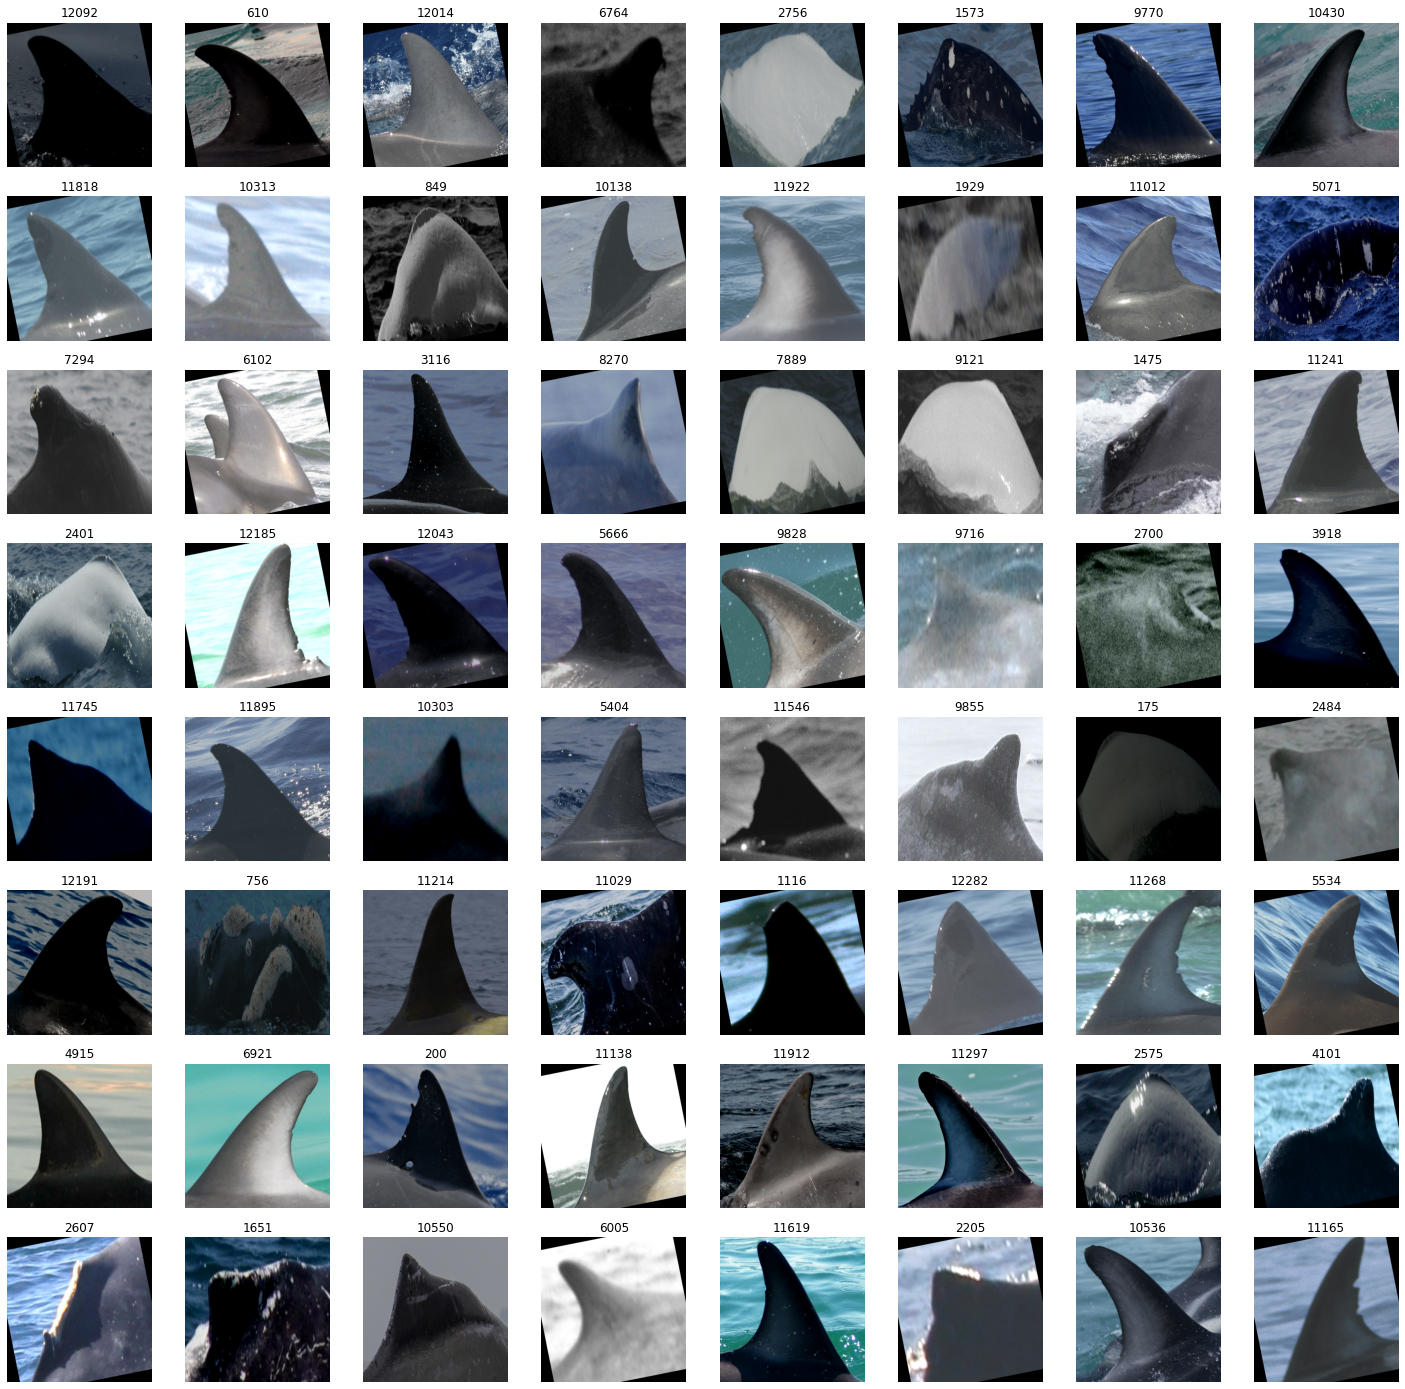

(64, 640, 640, 3)


In [15]:
row = 10; col = 8;
row = min(row,config.BATCH_SIZE//col)
N_TRAIN = count_data_items(train_files)
print(N_TRAIN)
ds = get_training_dataset(train_files)

for (sample,label) in ds:
    img = sample['inp1']
    plt.figure(figsize=(25,int(25*row/col)))
    for j in range(row*col):
        plt.subplot(row,col,j+1)
        plt.title(label[j].numpy())
        plt.axis('off')
        plt.imshow(img[j,])
    plt.show()
    break
print(img.shape)

## Model

In [16]:
# Arcmarginproduct class keras layer
class ArcMarginProduct(tf.keras.layers.Layer):
    '''
    Implements large margin arc distance.

    Reference:
        https://arxiv.org/pdf/1801.07698.pdf
        https://github.com/lyakaap/Landmark2019-1st-and-3rd-Place-Solution/
            blob/master/src/modeling/metric_learning.py
    '''
    def __init__(self, n_classes, s=30, m=0.50, easy_margin=False,
                 ls_eps=0.0, **kwargs):

        super(ArcMarginProduct, self).__init__(**kwargs)

        self.n_classes = n_classes
        self.s = s
        self.m = m
        self.ls_eps = ls_eps
        self.easy_margin = easy_margin
        self.cos_m = tf.math.cos(m)
        self.sin_m = tf.math.sin(m)
        self.th = tf.math.cos(math.pi - m)
        self.mm = tf.math.sin(math.pi - m) * m

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'n_classes': self.n_classes,
            's': self.s,
            'm': self.m,
            'ls_eps': self.ls_eps,
            'easy_margin': self.easy_margin,
        })
        return config

    def build(self, input_shape):
        super(ArcMarginProduct, self).build(input_shape[0])

        self.W = self.add_weight(
            name='W',
            shape=(int(input_shape[0][-1]), self.n_classes),
            initializer='glorot_uniform',
            dtype='float32',
            trainable=True,
            regularizer=None)

    def call(self, inputs):
        X, y = inputs
        y = tf.cast(y, dtype=tf.int32)
        cosine = tf.matmul(
            tf.math.l2_normalize(X, axis=1),
            tf.math.l2_normalize(self.W, axis=0)
        )
        sine = tf.math.sqrt(1.0 - tf.math.pow(cosine, 2))
        phi = cosine * self.cos_m - sine * self.sin_m
        if self.easy_margin:
            phi = tf.where(cosine > 0, phi, cosine)
        else:
            phi = tf.where(cosine > self.th, phi, cosine - self.mm)
        one_hot = tf.cast(
            tf.one_hot(y, depth=self.n_classes),
            dtype=cosine.dtype
        )
        if self.ls_eps > 0:
            one_hot = (1 - self.ls_eps) * one_hot + self.ls_eps / self.n_classes

        output = (one_hot * phi) + ((1.0 - one_hot) * cosine)
        output *= self.s
        return output


class ArcMarginProduct_subcenter(tf.keras.layers.Layer):
    '''
    Implements large margin arc distance.

    Reference:
        https://arxiv.org/pdf/1801.07698.pdf
        https://github.com/lyakaap/Landmark2019-1st-and-3rd-Place-Solution/
            blob/master/src/modeling/metric_learning.py
    '''
    def __init__(self, n_classes, s=30, m=0.50, easy_margin=False,
                 ls_eps=0.0,k=3, **kwargs):

        super(ArcMarginProduct_subcenter, self).__init__(**kwargs)

        self.n_classes = n_classes
        self.s = s
        self.m = m
        self.k = k
        self.ls_eps = ls_eps
        self.easy_margin = easy_margin
        self.cos_m = tf.math.cos(m)
        self.sin_m = tf.math.sin(m)
        self.th = tf.math.cos(math.pi - m)
        self.mm = tf.math.sin(math.pi - m) * m

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'n_classes': self.n_classes,
            's': self.s,
            'm': self.m,
            'ls_eps': self.ls_eps,
            'easy_margin': self.easy_margin,
        })
        return config

    def build(self, input_shape):
        super(ArcMarginProduct_subcenter, self).build(input_shape[0])

        self.W = self.add_weight(
            name='W',
            shape=(int(input_shape[0][-1]), int(self.n_classes)*self.k),
            initializer='glorot_uniform',
            dtype='float32',
            trainable=True,
            regularizer=None)

    def call(self, inputs):
        X, y = inputs
        y = tf.cast(y, dtype=tf.int32)
        # print(X.shape)
        
        cosine = tf.matmul(
            tf.math.l2_normalize(X, axis=1),
            tf.math.l2_normalize(self.W, axis=0)
        )
        # print(cosine.shape)
        cosine =tf.reshape(cosine ,[-1,self.n_classes,self.k])
        # print(cosine.shape)
        cosine = tf.reduce_max(cosine,axis=2)
        # print(cosine.shape)
        sine = tf.math.sqrt(1.0 - tf.math.pow(cosine, 2))
        phi = cosine * self.cos_m - sine * self.sin_m
        if self.easy_margin:
            phi = tf.where(cosine > 0, phi, cosine)
        else:
            phi = tf.where(cosine > self.th, phi, cosine - self.mm)
        one_hot = tf.cast(
            tf.one_hot(y, depth=self.n_classes),
            dtype=cosine.dtype
        )
        if self.ls_eps > 0:
            one_hot = (1 - self.ls_eps) * one_hot + self.ls_eps / self.n_classes

        output = (one_hot * phi) + ((1.0 - one_hot) * cosine)
        output *= self.s
        return output
#CurricularFace class keras layer
class CurricularFace(tf.keras.layers.Layer):
    '''
    Implements Curricular Face.
    Reference:
        To be added
    '''
    def __init__(self, n_classes, s=30, m=0.50, easy_margin=False,
                 ls_eps=0.0, **kwargs):

        super(CurricularFace, self).__init__(**kwargs)

        self.n_classes = n_classes
        self.s = s
        self.m = m
        self.ls_eps = ls_eps
        self.easy_margin = easy_margin
        self.cos_m = tf.math.cos(m)
        self.sin_m = tf.math.sin(m)
        self.th = tf.math.cos(math.pi - m)
        self.mm = tf.math.sin(math.pi - m) * m

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'n_classes': self.n_classes,
            's': self.s,
            'm': self.m,
            'ls_eps': self.ls_eps,
            'easy_margin': self.easy_margin,
        })
        return config

    def build(self, input_shape):
        super(CurricularFace, self).build(input_shape[0])

        self.kernel = self.add_weight(
            name='W',
            shape=(int(input_shape[0][-1]), self.n_classes),
            initializer='glorot_uniform',
            dtype='float32',
            trainable=True,
            aggregation=tf.VariableAggregation.MEAN,
            regularizer=None)
        
        self.t = self.add_weight(
              name='t',
              shape=(1,),
              dtype='float32',
              initializer=tf.keras.initializers.get('zeros'),
              synchronization=tf.VariableSynchronization.ON_READ,
              trainable=False,
              aggregation=tf.VariableAggregation.MEAN,
              experimental_autocast=False)
    
    def _assign_new_value(self, variable, value):
        with tf.keras.backend.name_scope('AssignNewValue') as scope:
            if tf.compat.v1.executing_eagerly_outside_functions():
                return variable.assign(value, name=scope)
            else:
                with tf.compat.v1.colocate_with(variable):  # pylint: disable=protected-access
                    return tf.compat.v1.assign(variable, value, name=scope)

    def call(self, inputs):
        embeddings, label = inputs
        label = tf.cast(label,tf.int32)
        embeddings = tf.math.l2_normalize(embeddings, axis=1)
        kernel_norm = tf.math.l2_normalize(self.kernel, axis=0)
        cos_theta = tf.matmul(embeddings, kernel_norm)
        cos_theta = tf.clip_by_value(cos_theta,-1,1) # for numerical stability
        origin_cos = tf.identity(cos_theta)
        out = tf.stack([tf.range(0,tf.shape(embeddings)[0]),label],axis=1)
        target_logit = tf.gather_nd(cos_theta,tf.transpose([tf.range(0,tf.shape(embeddings)[0]),label]))

        sin_theta = tf.math.sqrt(1.0 - tf.math.pow(target_logit, 2))
        cos_theta_m = target_logit * self.cos_m - sin_theta * self.sin_m #cos(target+margin) 
        final_target_logit = tf.where(target_logit > self.th, cos_theta_m, target_logit - self.mm)
        
        
        one_hot = tf.cast(
                    tf.one_hot(label, depth=self.n_classes),
                    dtype=cos_theta.dtype
                )


        mask = cos_theta > cos_theta_m[:,None]
        hard_example = tf.identity(cos_theta)
        self._assign_new_value(self.t, tf.reduce_mean(target_logit) * 0.01 + (1 - 0.01) * self.t)
        cos_hard = hard_example * (self.t + hard_example)
        cos_theta = tf.where(mask, cos_hard, cos_theta)  
        cos_theta = one_hot*final_target_logit[:,None]+((1.0 - one_hot) * cos_theta)
        output = cos_theta * self.s
        return output

In [17]:
MODEL_NAME = None
if config.model_type == 'effnetv1':
    MODEL_NAME = f'effnetv1_b{config.EFF_NET}'
elif config.model_type == 'effnetv2':
    MODEL_NAME = f'effnetv2_{config.EFF_NETV2}'
else:
    MODEL_NAME = config.model_type
config.MODEL_NAME = MODEL_NAME
print(MODEL_NAME)

effnetv1_b7


In [18]:
class GeM(tf.keras.layers.Layer):
    def __init__(self, init_norm=3.0, **kwargs):
        super(GeM, self).__init__(**kwargs)
        self.init_norm = init_norm
        self.gap2d = tf.keras.layers.GlobalAveragePooling2D()

    def build(self, input_shape):
        super(GeM, self).build(input_shape)
        feature_size = input_shape[-1]
        self.p = self.add_weight(
                name = "norms",
                shape = feature_size,
                initializer = tf.keras.initializers.constant(self.init_norm),
                trainable = True,
            )

    def call(self, inputs):
        x = tf.math.maximum(inputs, EPS)
        x = tf.pow(x, self.p)

        x = self.gap2d(x)
        x = tf.pow(x, 1.0 / self.p)

        return x

In [19]:
# Multi-Atrous Branch
class MultiAtrous(tf.keras.layers.Layer):
    def __init__(self, dolg_s, upsampling=1, kernel_size=3, padding="same",  **kwargs):
        super(MultiAtrous, self).__init__(**kwargs)
        self.d0 = tf.keras.layers.Conv2D(dolg_s // 2, 3, dilation_rate=(3,3), padding='same')
        self.d1 = tf.keras.layers.Conv2D(dolg_s // 2, 3, dilation_rate=(6,6), padding='same')
        self.d2 = tf.keras.layers.Conv2D(dolg_s // 2, 3, dilation_rate=(9,9), padding='same')
        self.conv1 = tf.keras.layers.Conv2D(dolg_s, kernel_size=1)
        
    @tf.function()
    def call(self, inputs, training=None, **kwargs):
        x0 = self.d0(inputs)
        x1 = self.d1(inputs)
        x2 = self.d2(inputs)
        x = tf.keras.layers.Concatenate(axis=3)([x0,x1,x2])
        x = self.conv1(x)
        x = tf.keras.activations.relu(x)
        return x
            
    def get_config(self):
        config = {
            'dilation_rates': self.dilation_rates,
            'kernel_size'   : self.kernel_size,
            'padding'       : self.padding,
            'upsampling'    : self.upsampling
        }
        base_config = super(MultiAtrous, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [20]:
class SpatialAttention2d(tf.keras.layers.Layer):
    def __init__(self, dolg_s, **kwargs):
        super(SpatialAttention2d, self).__init__(**kwargs)
        self.conv1 = tf.keras.layers.Conv2D(dolg_s, 1)
        self.bn = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(1, 1)

    @tf.function()
    def call(self, x):
        x = self.conv1(x)
        x = self.bn(x)
        
        feature_map_norm, _ = tf.linalg.normalize(x, ord=2, axis=3)
        
        x = tf.keras.activations.relu(x)
        x = self.conv2(x)
        
        att_score = tf.keras.activations.softplus(x)
        
        x = att_score * feature_map_norm

        return x

In [21]:
class OrthogonalFusion(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
    @tf.function()
    def call(self, inputs):
        fl, fg = inputs
        fl = tf.transpose(fl, [0,3,1,2])
        
        bs, c, w, h = fl.shape
        
        fl_b = tf.reshape(fl, [tf.shape(fl)[0],c,w*h])
        fl_dot_fg = tf.matmul(fg[:,tf.newaxis,:] ,fl_b)
       
        fl_dot_fg = tf.reshape(fl_dot_fg, [tf.shape(fl_dot_fg)[0],1,w,h])
        
        fg_norm = tf.norm(fg, ord=2, axis=1)
        
        fl_proj = (fl_dot_fg / fg_norm[:,tf.newaxis,tf.newaxis,tf.newaxis]) * fg[:,:,tf.newaxis,tf.newaxis]
        fl_orth = fl - fl_proj
        
        fg_rep = tf.tile(fg[:,:,tf.newaxis,tf.newaxis], multiples=(1,1,w,h))
        f_fused = tf.keras.layers.Concatenate(axis=1)([fl_orth, fg_rep])
        
        # Transpose
        f_fused = tf.transpose(f_fused, [0,2,3,1])
        
        return f_fused

In [22]:
class GlobalBranch(tf.keras.layers.Layer):
    def __init__(self, dolg_s, **kwargs):
        super().__init__(**kwargs)
        self.conv2d = tf.keras.layers.Conv2D(dolg_s, 1, name='global_conv2d')
        self.bn = tf.keras.layers.BatchNormalization()
        self.pool = GeM()#tf.keras.layers.GlobalAveragePooling2D()
        
    @tf.function()
    def call(self, inputs):
        x = self.conv2d(inputs)
        x = self.bn(x)
        x = tf.nn.silu(x)
        x = self.pool(x)
        
        return x

In [23]:
class DolgBranch(tf.keras.layers.Layer):
    def __init__(self, dolg_s, idx, **kwargs):
        super().__init__(name=f'dolg_branch_{idx}', **kwargs)
        dolg_s = int(dolg_s)
        # Local
        self.mam = MultiAtrous(dolg_s, name=f'mam_{idx}')
        self.sa2d = SpatialAttention2d(dolg_s, name=f'sa2d_{idx}')
        # Global
        self.global_branch = GlobalBranch(dolg_s, name=f'g_{idx}')
        # Orthogonal Fusion
        self.orthogonal_fusion = OrthogonalFusion()
        # Pooling
        self.pool = GeM()#tf.keras.layers.GlobalAveragePooling2D()
        
    @tf.function()
    def call(self, inputs):
        inputs_l, inputs_g = inputs
        # Local
        l = self.mam(inputs_l)
        l = self.sa2d(l)
        # Global
        g = self.global_branch(inputs_g)
        # Orthogonal Fusion
        f = self.orthogonal_fusion([l, g])
        # Pooling
        descriptor = self.pool(f)
        
        return descriptor

In [24]:
EFNS = [efn.EfficientNetB0, efn.EfficientNetB1, efn.EfficientNetB2, efn.EfficientNetB3, 
        efn.EfficientNetB4, efn.EfficientNetB5, efn.EfficientNetB6, efn.EfficientNetB7]


def freeze_BN(model):
    # Unfreeze layers while leaving BatchNorm layers frozen
    for layer in model.layers:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True
        else:
            layer.trainable = False

# Function to create our EfficientNetB3 model
def get_model(count = 0):

    if config.head=='arcface':
      head = ArcMarginProduct
    elif config.head=='arcface_subcenter':
      head = ArcMarginProduct_subcenter
    elif config.head=='curricularface':
      head = CurricularFace
    else:
        assert 1==2, "INVALID HEAD"
    
    with strategy.scope():
        
        margin = head(
            n_classes = config.N_CLASSES, 
            s = 30, 
            m = 0.3, 
            name=f'head/{config.head}', 
            dtype='float32'
            )


        # inp = tf.keras.layers.Input(shape = [config.IMAGE_SIZE, config.IMAGE_SIZE, 3], name = 'inp1')
        label = tf.keras.layers.Input(shape = (), name = 'inp2')

        if config.model_type == 'effnetv1':
            # x = EFNS[config.EFF_NET](weights = 'noisy-student', include_top = False)(inp)
            # embed = tf.keras.layers.GlobalAveragePooling2D()(x)
            inp = EFNS[config.EFF_NET](weights = 'noisy-student', include_top = False,input_shape = [config.IMAGE_SIZE, config.IMAGE_SIZE, 3])
            inp.layers[0]._name = 'inp1'

            #def GEM_Pooling(x,size=24):
            #  x=GeM(size)(x)
            #  x= tf.keras.layers.Flatten()(x)
            #  return x
            '''effnet-b5'''
            #x1=GEM_Pooling(inp.layers[-1].output,24)
            #x2=GEM_Pooling(inp.layers[-4].output,24)
            #x3=GEM_Pooling(inp.layers[-47].output,24)
            #x4=GEM_Pooling(inp.layers[-180].output,48)
            #x5=GEM_Pooling(inp.layers[-283].output,48)
            x1 = inp.layers[-1].output#-4
            #x2 = inp.layers[-47].output
            #x3 = inp.layers[-180].output
            x4 = inp.layers[-62].output
            #c1 = tf.keras.layers.Concatenate(axis=-1)([x1, x2])
            #c2 = tf.keras.layers.Concatenate(axis=-1)([x3, x4])
            #'''effnet-b6'''
            #x1=GEM_Pooling(inp.layers[-1].output,inp.layers[-1].output.shape[-2])
            #x2=GEM_Pooling(inp.layers[-4].output,inp.layers[-4].output.shape[-2]) 
            #x3=GEM_Pooling(inp.layers[-47].output,inp.layers[-47].output.shape[-2])
            #x4=GEM_Pooling(inp.layers[-210].output,inp.layers[-210].output.shape[-2])
            #x5=GEM_Pooling(inp.layers[-328].output,inp.layers[-328].output.shape[-2])
            '''effnet-b7'''
            # x1=GEM_Pooling(inp.layers[-1].output,24)
            # x2=GEM_Pooling(inp.layers[-4].output,24)
            # x3=GEM_Pooling(inp.layers[-62].output,24)
            # x4=GEM_Pooling(inp.layers[-270].output,48)
            # x5=GEM_Pooling(inp.layers[-403].output,48)

            #embed = tf.concat([x1,x2,x3,x4,x5],axis = 1)
            #embed = tf.keras.layers.BatchNormalization()(embed)
            #embed = tf.nn.swish(embed)
            embed = DolgBranch(2048, 1)([x1, x4])

        elif config.model_type == 'effnetv2':
            FEATURE_VECTOR = f'{EFFNETV2_ROOT}/tfhub_models/efficientnetv2-{config.EFF_NETV2}/feature_vector'
            embed = tfhub.KerasLayer(FEATURE_VECTOR, trainable=True)(inp)
        else:
            embed = tfimm.create_model(config.model_type, pretrained="timm")(inp)
            #embed = tf.keras.layers.GlobalAveragePooling2D()(x)
        

        embed = tf.keras.layers.Dropout(0.2)(embed)
        embed = tf.keras.layers.Dense(2048)(embed)
        embed = tf.keras.layers.BatchNormalization()(embed)
        x = margin([embed, label])
        
        output = tf.keras.layers.Softmax(dtype='float32')(x)
        
        model = tf.keras.models.Model(inputs = [inp.input, label], outputs = [output])
        embed_model = tf.keras.models.Model(inputs = inp.input, outputs = embed)   
        count=count_data_items(TRAINING_FILENAMES) // config.BATCH_SIZE 
        step = config.EPOCHS//2
        lr_schedule = tf.keras.experimental.CosineDecayRestarts(
            initial_learning_rate = 0.000005 * config.BATCH_SIZE,
            first_decay_steps = count*step,	# 当前全局iter迭代次数，传入一个递增的variable
            t_mul=1.0,	# 后续的warm restarts衰减周期相较于前一次的倍率（周期越来越长）
            m_mul=0.5,	# 每一次warm restarts学习率峰值的改变
            alpha=0.000001,	# 学习率到最小衰减到多少
            )
        opt = tf.keras.optimizers.Adam(learning_rate = lr_schedule)
        if config.FREEZE_BATCH_NORM:
            freeze_BN(model)

        model.compile(
            optimizer = opt,
            loss = [tf.keras.losses.SparseCategoricalCrossentropy()],
            metrics = [tf.keras.metrics.SparseCategoricalAccuracy(),tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5)]
            ) 
        
        return model,embed_model

## Train

In [25]:
'''分折'''
TRAINING_FILENAMES = [x for i,x in enumerate(train_files) if f'-{config.FOLD_TO_RUN}-' not in x ]+[x for i,x in enumerate(train_files2)]
VALIDATION_FILENAMES = [x for i,x in enumerate(train_files) if f'-{config.FOLD_TO_RUN}-' in x]
print(len(TRAINING_FILENAMES),len(VALIDATION_FILENAMES),count_data_items(TRAINING_FILENAMES),count_data_items(VALIDATION_FILENAMES))

5 1 65820 10206


In [26]:
TRAINING_FILENAMES

['gs://kds-da2f897ed8c8dc563a063966df60efe5b7515061aaaa2c0bb4752574/happywhale-2022-train-1-10205.tfrec',
 'gs://kds-da2f897ed8c8dc563a063966df60efe5b7515061aaaa2c0bb4752574/happywhale-2022-train-2-10205.tfrec',
 'gs://kds-da2f897ed8c8dc563a063966df60efe5b7515061aaaa2c0bb4752574/happywhale-2022-train-3-10205.tfrec',
 'gs://kds-da2f897ed8c8dc563a063966df60efe5b7515061aaaa2c0bb4752574/happywhale-2022-train-4-10205.tfrec',
 'gs://kds-404dbb209296145e1e6bc545c848507df86e713e9d0fa0aa01d1e452/happywhale-2022-train-100-25000.tfrec']

In [27]:
VALIDATION_FILENAMES

['gs://kds-da2f897ed8c8dc563a063966df60efe5b7515061aaaa2c0bb4752574/happywhale-2022-train-0-10206.tfrec']

In [28]:
count=count_data_items(TRAINING_FILENAMES) // config.BATCH_SIZE  // 4
count

257

In [29]:
if config.DEBUG:
    TRAINING_FILENAMES = [TRAINING_FILENAMES[0]]
    VALIDATION_FILENAMES = [VALIDATION_FILENAMES[0]]
    print(len(TRAINING_FILENAMES),len(VALIDATION_FILENAMES),count_data_items(TRAINING_FILENAMES),count_data_items(VALIDATION_FILENAMES))
    test_files = [test_files[0]]

In [30]:
seed_everything(config.SEED)
VERBOSE = 2
train_dataset = get_training_dataset(TRAINING_FILENAMES)
val_dataset = get_val_dataset(VALIDATION_FILENAMES)
STEPS_PER_EPOCH = count_data_items(TRAINING_FILENAMES) // config.BATCH_SIZE
train_logger = tf.keras.callbacks.CSVLogger('training-log-fold-%i.h5.csv'%config.FOLD_TO_RUN)
# SAVE BEST MODEL EACH FOLD        
sv_loss = tf.keras.callbacks.ModelCheckpoint(
    config.save_dir+f"/{config.MODEL_NAME}_loss_{config.FOLD_TO_RUN}.h5", monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='min', save_freq='epoch')
# BUILD MODEL
K.clear_session()
model,embed_model = get_model(count = count)
#snap = Snapshot(fold=config.FOLD_TO_RUN,snapshot_epochs=[5,8])
#model.summary()

#if config.RESUME:   
#    model.load_weights(config.save_dir+f"/{config.MODEL_NAME}_loss_{config.FOLD_TO_RUN}.h5")

258072576/258068648 [==============================] - 5s 0us/step


In [31]:
import gc
gc.collect()

5595

In [32]:
print('#### Image Size %i with EfficientNet B%i and batch_size %i'%
      (config.IMAGE_SIZE,config.EFF_NET,config.BATCH_SIZE))



#### Image Size 640 with EfficientNet B7 and batch_size 64


In [33]:
#model.load_weights('/content/drive/MyDrive/happywhale/backfin/effnetv1_b7_loss_4.h5')

In [34]:
history = model.fit(train_dataset,
                validation_data = val_dataset,
                steps_per_epoch = STEPS_PER_EPOCH,
                epochs = config.EPOCHS,
                callbacks = [train_logger,sv_loss], 
                verbose = VERBOSE)

Epoch 1/60
1028/1028 - 1638s - loss: 16.1360 - sparse_categorical_accuracy: 3.3439e-04 - sparse_top_k_categorical_accuracy: 0.0010 - val_loss: 14.3031 - val_sparse_categorical_accuracy: 0.0049 - val_sparse_top_k_categorical_accuracy: 0.0157
Epoch 2/60
1028/1028 - 1166s - loss: 12.9872 - sparse_categorical_accuracy: 0.0232 - sparse_top_k_categorical_accuracy: 0.0510 - val_loss: 11.8110 - val_sparse_categorical_accuracy: 0.1076 - val_sparse_top_k_categorical_accuracy: 0.1625
Epoch 3/60
1028/1028 - 1166s - loss: 10.2122 - sparse_categorical_accuracy: 0.0815 - sparse_top_k_categorical_accuracy: 0.1370 - val_loss: 10.2971 - val_sparse_categorical_accuracy: 0.1839 - val_sparse_top_k_categorical_accuracy: 0.2607
Epoch 4/60
1028/1028 - 1166s - loss: 8.1289 - sparse_categorical_accuracy: 0.1398 - sparse_top_k_categorical_accuracy: 0.2180 - val_loss: 9.1370 - val_sparse_categorical_accuracy: 0.2588 - val_sparse_top_k_categorical_accuracy: 0.3471
Epoch 5/60
1028/1028 - 1166s - loss: 6.5537 - spar

In [35]:
model.load_weights(config.save_dir+f"/{config.MODEL_NAME}_loss_{config.FOLD_TO_RUN}.h5")
# model.load_weights(config.save_dir+f"/{config.MODEL_NAME}_loss_0.h5")
# model.load_weights(config.save_dir+f"/{config.MODEL_NAME}_last.h5")

In [36]:
embed_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inp1 (InputLayer)               [(None, 640, 640, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 320, 320, 64) 1728        inp1[0][0]                       
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 320, 320, 64) 256         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 320, 320, 64) 0           stem_bn[0][0]                    
____________________________________________________________________________________________

## Evaluation

In [37]:
def get_ids(filename):
    ds = get_test_dataset([filename],get_names=True).map(lambda image, image_name: image_name).unbatch()
    NUM_IMAGES = count_data_items([filename])
    ids = next(iter(ds.batch(NUM_IMAGES))).numpy().astype('U')
    return ids

def get_targets(filename):
    ds = get_eval_dataset([filename],get_targets=True).map(lambda image, target: target).unbatch()
    NUM_IMAGES = count_data_items([filename])
    ids = next(iter(ds.batch(NUM_IMAGES))).numpy()
    return ids

def get_embeddings(filename):
    TTA = ['rotate0', 'rotate0_lr']
    for i,tta in enumerate(TTA):
      ds = get_test_dataset([filename],get_names=False,tta = tta)
      if i==0:
        test_embeddings=normalize(embed_model.predict(ds,verbose=0),axis=1)
      else:
        test_embeddings+=normalize(embed_model.predict(ds,verbose=0),axis=1)
    test_embeddings = normalize(test_embeddings,axis=1)
    return test_embeddings

def get_predictions(test_df,threshold=0.2):
    predictions = {}
    for i,row in tqdm(test_df.iterrows()):
        if row.image in predictions:
            if len(predictions[row.image])==5:
                continue
            predictions[row.image].append(row.target)
        elif row.confidence>threshold:
            predictions[row.image] = [row.target,'new_individual']
        else:
            predictions[row.image] = ['new_individual',row.target]

    for x in tqdm(predictions):
        if len(predictions[x])<5:
            remaining = [y for y in sample_list if y not in predictions]
            predictions[x] = predictions[x]+remaining
            predictions[x] = predictions[x][:5]
        
    return predictions

def map_per_image(label, predictions):
    """Computes the precision score of one image.

    Parameters
    ----------
    label : string
            The true label of the image
    predictions : list
            A list of predicted elements (order does matter, 5 predictions allowed per image)

    Returns
    -------
    score : double
    """    
    try:
        return 1 / (predictions[:5].index(label) + 1)
    except ValueError:
        return 0.0
    
f = open ('/content/drive/MyDrive/happywhale/individual_ids.json', "r")
target_encodings = json.loads(f.read())
target_encodings = {target_encodings[x]:x for x in target_encodings}
sample_list = ['938b7e931166', '5bf17305f073', '7593d2aee842', '7362d7a01d00','956562ff2888']

In [38]:
'''分折'''
TRAINING_FILENAMES = [x for i,x in enumerate(train_files) if ((f'-{config.FOLD_TO_RUN}-' not in x) and (f'-100-' not in x)) ]
VALIDATION_FILENAMES = [x for i,x in enumerate(train_files) if f'-{config.FOLD_TO_RUN}-' in x]
print(len(TRAINING_FILENAMES),len(VALIDATION_FILENAMES),count_data_items(TRAINING_FILENAMES),count_data_items(VALIDATION_FILENAMES))

4 1 40820 10206


In [39]:
train_targets = []
train_embeddings = []
train_data_list=[] 

for filename in tqdm(TRAINING_FILENAMES):
    embeddings = get_embeddings(filename)
    with open(config.save_dir+f'train_{filename.split("/")[-1]}_{config.FOLD_TO_RUN}.npy', 'wb') as f:
      np.save(f, embeddings)    
    targets = get_targets(filename)
    train_embeddings.append(embeddings[:len(targets)])
    train_targets.append(targets)
    #print(targets.shape)
    #print(embeddings.shape)
    train_data_list.append([filename,embeddings])
train_embeddings_df = pd.DataFrame(train_data_list, columns=['filename', 'embeddings'])
train_embeddings_df['FOLD_TO_RUN']=config.FOLD_TO_RUN
train_embeddings_df.to_csv(config.save_dir+f"/train_embeddings_{config.FOLD_TO_RUN}.csv",index=False)
train_embeddings = np.concatenate(train_embeddings)
train_targets = np.concatenate(train_targets)

  0%|          | 0/4 [00:00<?, ?it/s]

In [40]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=config.KNN, metric='cosine')
neigh.fit(train_embeddings)

NearestNeighbors(metric='cosine', n_neighbors=100)

In [41]:
train_embeddings.shape

(40820, 2048)

In [42]:
train_targets.shape

(40820,)

In [43]:
test_ids = []
test_nn_distances = []
test_nn_idxs = []
val_targets = []
val_embeddings = []
val_data_list=[] 
for filename in tqdm(VALIDATION_FILENAMES):
    ids = get_ids(filename)
    embeddings = get_embeddings(filename)[:len(ids)]
    with open(config.save_dir+f'val_{filename.split("/")[-1]}_{config.FOLD_TO_RUN}.npy', 'wb') as f:
      np.save(f, embeddings) 
    val_data_list.append([filename,embeddings])
    targets = get_targets(filename)
    ids = get_ids(filename)
    distances,idxs = neigh.kneighbors(embeddings, config.KNN, return_distance=True)
    test_ids.append(ids)
    test_nn_idxs.append(idxs)
    test_nn_distances.append(distances)
    val_embeddings.append(embeddings)
    val_targets.append(targets)
val_embeddings_df = pd.DataFrame(val_data_list, columns=['filename', 'embeddings'])
val_embeddings_df['FOLD_TO_RUN']=config.FOLD_TO_RUN
val_embeddings_df.to_csv(config.save_dir+f"/val_embeddings_{config.FOLD_TO_RUN}.csv",index=False)

test_nn_distances = np.concatenate(test_nn_distances)
test_nn_idxs = np.concatenate(test_nn_idxs)
test_ids = np.concatenate(test_ids)
val_embeddings = np.concatenate(val_embeddings)
val_targets = np.concatenate(val_targets)

  0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
allowed_targets = set([target_encodings[x] for x in np.unique(train_targets)])
val_targets_df = pd.DataFrame(np.stack([test_ids,val_targets],axis=1),columns=['image','target'])
val_targets_df['target'] = val_targets_df['target'].astype(int).map(target_encodings)
val_targets_df.loc[~val_targets_df.target.isin(allowed_targets),'target'] = 'new_individual'
val_targets_df.target.value_counts()

new_individual    1863
37c7aba965a5        80
114207cab555        34
c995c043c353        31
a6e325d8e924        31
                  ... 
d59648466917         1
dc43bdcb3f27         1
3c346fc4a109         1
906fd8ff812c         1
784c223a3895         1
Name: target, Length: 4024, dtype: int64

In [45]:
val_targets_df

,image,target
0,00021adfb725ed.jpg,new_individual
1,a05209b7b8d102.jpg,59300a2daae9
2,a0321ef3350fe8.jpg,new_individual
3,a02c37660e7b2e.jpg,e1b0c2253f06
4,a0294a4b6095bf.jpg,a9f87526d3ef
...,...,...
10201,156c023b965692.jpg,c995c043c353
10202,0cff3be87a5288.jpg,a6e325d8e924
10203,0491452500111c.jpg,114207cab555
10204,0106d276033b78.jpg,37c7aba965a5


In [46]:
test_nn_idxs.shape

(10206, 100)

In [47]:
test_df = []
for i in tqdm(range(len(test_ids))):
    id_ = test_ids[i]
    targets = train_targets[test_nn_idxs[i]]
    distances = test_nn_distances[i]
    subset_preds = pd.DataFrame(np.stack([targets,distances],axis=1),columns=['target','distances'])
    subset_preds['image'] = id_
    test_df.append(subset_preds)
test_df = pd.concat(test_df).reset_index(drop=True)
test_df['confidence'] = 1-test_df['distances']
test_df = test_df.groupby(['image','target']).confidence.max().reset_index()
test_df = test_df.sort_values('confidence',ascending=False).reset_index(drop=True)
test_df['target'] = test_df['target'].map(target_encodings)
test_df.to_csv('val_neighbors.csv')
test_df.image.value_counts().value_counts()

  0%|          | 0/10206 [00:00<?, ?it/s]

1     557
15    189
20    185
18    183
22    176
     ... 
93      5
95      4
97      2
96      2
98      2
Name: image, Length: 98, dtype: int64

In [48]:
## Compute CV
best_th = 0
best_cv = 0
for th in [0.1*x for x in range(11)]:
    all_preds = get_predictions(test_df,threshold=th)
    cv = 0
    for i,row in val_targets_df.iterrows():
        target = row.target
        preds = all_preds[row.image]
        val_targets_df.loc[i,th] = map_per_image(target,preds)
    cv = val_targets_df[th].mean()
    print(f"CV at threshold {th}: {cv}")
    if cv>best_cv:
        best_th = th
        best_cv = cv

0it [00:00, ?it/s]

  0%|          | 0/10206 [00:00<?, ?it/s]

CV at threshold 0.0: 0.8101851851851832


0it [00:00, ?it/s]

  0%|          | 0/10206 [00:00<?, ?it/s]

CV at threshold 0.1: 0.8101851851851832


0it [00:00, ?it/s]

  0%|          | 0/10206 [00:00<?, ?it/s]

CV at threshold 0.2: 0.8101851851851832


0it [00:00, ?it/s]

  0%|          | 0/10206 [00:00<?, ?it/s]

CV at threshold 0.30000000000000004: 0.8101851851851832


0it [00:00, ?it/s]

  0%|          | 0/10206 [00:00<?, ?it/s]

CV at threshold 0.4: 0.8156721536351146


0it [00:00, ?it/s]

  0%|          | 0/10206 [00:00<?, ?it/s]

CV at threshold 0.5: 0.8683372525965103


0it [00:00, ?it/s]

  0%|          | 0/10206 [00:00<?, ?it/s]

CV at threshold 0.6000000000000001: 0.8721095434058382


0it [00:00, ?it/s]

  0%|          | 0/10206 [00:00<?, ?it/s]

CV at threshold 0.7000000000000001: 0.845458553791885


0it [00:00, ?it/s]

  0%|          | 0/10206 [00:00<?, ?it/s]

CV at threshold 0.8: 0.802983539094648


0it [00:00, ?it/s]

  0%|          | 0/10206 [00:00<?, ?it/s]

CV at threshold 0.9: 0.7197481873407783


0it [00:00, ?it/s]

  0%|          | 0/10206 [00:00<?, ?it/s]

CV at threshold 1.0: 0.5478395061728383


In [49]:
print("Best threshold",best_th)
print("Best cv",best_cv)
val_targets_df.describe()

Best threshold 0.6000000000000001
Best cv 0.8721095434058382


,0.0,0.1,0.2,0.30000000000000004,0.4,0.5,0.6000000000000001,0.7000000000000001,0.8,0.9,1.0
count,10206.000000,10206.000000,10206.000000,10206.000000,10206.000000,10206.000000,10206.000000,10206.000000,10206.000000,10206.000000,10206.000000
mean,0.810185,0.810185,0.810185,0.810185,0.815672,0.868337,0.872110,0.845459,0.802984,0.719748,0.547840
std,0.316198,0.316198,0.316198,0.316198,0.315104,0.299331,0.297812,0.307394,0.317485,0.320451,0.250462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,1.000000,0.500000,0.500000,0.500000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
## Adjustment: Since Public lb has nearly 10% 'new_individual' (Be Careful for private LB)
val_targets_df['is_new_individual'] = val_targets_df.target=='new_individual'
print(val_targets_df.is_new_individual.value_counts().to_dict())
val_scores = val_targets_df.groupby('is_new_individual').mean().T
val_scores['adjusted_cv'] = val_scores[True]*0.1+val_scores[False]*0.9
best_threshold_adjusted = val_scores['adjusted_cv'].idxmax()
print("best_threshold",best_threshold_adjusted)
val_scores

{False: 8343, True: 1863}
best_threshold 0.5


is_new_individual,False,True,adjusted_cv
0.0,0.879450,0.500000,0.841505
0.1,0.879450,0.500000,0.841505
0.2,0.879450,0.500000,0.841505
0.30000000000000004,0.879450,0.500000,0.841505
0.4,0.879450,0.530059,0.844511
0.5,0.874296,0.841653,0.871032
0.6000000000000001,0.850923,0.966989,0.862530
0.7000000000000001,0.814126,0.985776,0.831291
0.8,0.759769,0.996511,0.783443
0.9,0.657288,0.999463,0.691505


## Inference

In [51]:
train_embeddings = np.concatenate([train_embeddings,val_embeddings])
train_targets = np.concatenate([train_targets,val_targets])
print(train_embeddings.shape,train_targets.shape)

(51026, 2048) (51026,)


In [52]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=config.KNN,metric='cosine')
neigh.fit(train_embeddings)

NearestNeighbors(metric='cosine', n_neighbors=100)

In [53]:
test_ids = []
test_nn_distances = []
test_nn_idxs = []
test_data_list=[] 
for filename in tqdm(test_files):
    ids = get_ids(filename)

    embeddings = get_embeddings(filename)[:len(ids)]
    with open(config.save_dir+f'test_{filename.split("/")[-1]}_{config.FOLD_TO_RUN}.npy', 'wb') as f:
      np.save(f, embeddings) 
    test_data_list.append([filename,embeddings])
    
    distances,idxs = neigh.kneighbors(embeddings, config.KNN, return_distance=True)
    test_ids.append(ids)
    test_nn_idxs.append(idxs)
    test_nn_distances.append(distances)

test_embeddings_df = pd.DataFrame(test_data_list, columns=['filename', 'embeddings'])
test_embeddings_df['FOLD_TO_RUN']=config.FOLD_TO_RUN
test_embeddings_df.to_csv(config.save_dir+f"/test_embeddings_{config.FOLD_TO_RUN}.csv",index=False)



test_nn_distances = np.concatenate(test_nn_distances)
test_nn_idxs = np.concatenate(test_nn_idxs)
test_ids = np.concatenate(test_ids)

  0%|          | 0/5 [00:00<?, ?it/s]

In [54]:
train_targets.shape

(51026,)

In [55]:
sample_submission = pd.read_csv('/content/drive/MyDrive/happywhale/sample_submission.csv',index_col='image')
print(len(test_ids),len(sample_submission))
test_df = []
for i in tqdm(range(len(test_ids))):
    id_ = test_ids[i]
    targets = train_targets[test_nn_idxs[i]]
    distances = test_nn_distances[i]
    subset_preds = pd.DataFrame(np.stack([targets,distances],axis=1),columns=['target','distances'])
    subset_preds['image'] = id_
    test_df.append(subset_preds)
test_df = pd.concat(test_df).reset_index(drop=True)
test_df['confidence'] = 1-test_df['distances']
test_df = test_df.groupby(['image','target']).confidence.max().reset_index()
test_df = test_df.sort_values('confidence',ascending=False).reset_index(drop=True)
test_df['target'] = test_df['target'].map(target_encodings)
test_df.to_csv('test_neighbors.csv')
test_df.image.value_counts().value_counts()

27956 27956


  0%|          | 0/27956 [00:00<?, ?it/s]

1      663
25     459
24     440
21     436
22     436
      ... 
98       9
95       8
97       5
99       3
100      1
Name: image, Length: 100, dtype: int64

In [56]:
sample_list = ['938b7e931166', '5bf17305f073', '7593d2aee842', '7362d7a01d00','956562ff2888']

In [57]:
predictions = {}
for i,row in tqdm(test_df.iterrows()):
    if row.image in predictions:
        if len(predictions[row.image])==5:
            continue
        predictions[row.image].append(row.target)
    elif row.confidence>best_threshold_adjusted:
        predictions[row.image] = [row.target,'new_individual']
    else:
        predictions[row.image] = ['new_individual',row.target]
        
for x in tqdm(predictions):
    if len(predictions[x])<5:
        remaining = [y for y in sample_list if y not in predictions]
        predictions[x] = predictions[x]+remaining
        predictions[x] = predictions[x][:5]
    predictions[x] = ' '.join(predictions[x])
    
predictions = pd.Series(predictions).reset_index()
predictions.columns = ['image','predictions']
predictions.to_csv(config.save_dir+f"/submission.csv",index=False)
predictions.head()

0it [00:00, ?it/s]

  0%|          | 0/27956 [00:00<?, ?it/s]

,image,predictions
0,d43a1cced26011.jpg,982224d06f8c new_individual 91970ecd7d55 99591...
1,0c9bc56047a552.jpg,babd014300b7 new_individual f8d95c7b3fa6 80d28...
2,634306ff981924.jpg,fd92aac78676 new_individual d21a7ece6785 1c496...
3,891d66b66680e8.jpg,0ad50d0d9b06 new_individual 5ac053677ed1 c0507...
4,4a207f09a87442.jpg,29623de1f9a5 new_individual bdd6e53061cd d5b28...


In [58]:
config.save_dir+f"submission_origin.csv"

'/content/drive/MyDrive/happywhale/backfin/fold0_dolg_b7x640_half_feat2_pl_25k_ep60/submission_origin.csv'